In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 3サンプルを重ねて可視化
df1 = pd.read_csv("20201009_nakato_sampledata/E024-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')
df2 = pd.read_csv("20201009_nakato_sampledata/E058-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')
df3 = pd.read_csv("20201009_nakato_sampledata/E096-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')

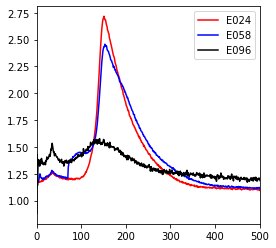

In [3]:
plt.figure(figsize=(4,4))
plt.plot(df1["per control"], label="E024", color="red")
plt.plot(df2["per control"], label="E058", color="blue")
plt.plot(df3["per control"], label="E096", color="black")
plt.xlim(0,500)
plt.legend(loc='upper right')

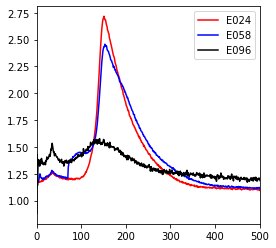

In [4]:
# 図をpdfにして保存
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.xlim(0,500)
plt.legend(loc='upper right')
plt.savefig("Sample.Jaccard.0-500.pdf")

## お題

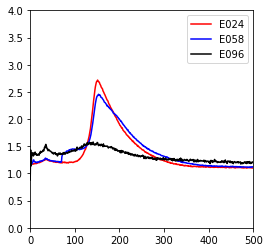

In [5]:
# お題１：
# 上の３サンプルの図について、y軸のスケールを0から4にして表示する。
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.xlim(0,500)
plt.ylim(0,4)
plt.legend(loc='upper right')
#plt.savefig("Sample.Jaccard.y0-4.pdf")

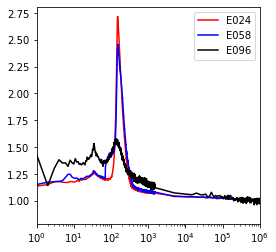

In [6]:
# お題２：
# 上の３サンプルの図について、x軸を対数軸にし、0から1000000まで表示してみる。
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.xscale("log") # x軸を対数軸にする
plt.xlim(1,1000000)
# x軸が対数軸で0~1000000にしているため、xlimの警告が出てくる。
#plt.ylim(0,4)
plt.legend(loc='upper right')
#plt.savefig("Sample.Jaccard.y0-4.pdf")

              per control  per control  per control   average
Strand shift                                                 
-500              1.08429      1.09770      1.18524  1.122410
-499              1.08991      1.09431      1.19780  1.127340
-498              1.09435      1.10133      1.19647  1.130717
-497              1.08506      1.09593      1.18893  1.123307
-496              1.09482      1.09251      1.18317  1.123500


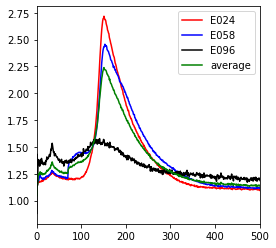

In [7]:
# お題３：
# 上の３サンプルの図について、３サンプルの「平均値」を持ったデータを作成し、上の図に追加で表示。（色は何色でもよい）

#平均データの計算
ave = pd.concat([df1["per control"],df2["per control"],df3["per control"]],axis = 1)
ave["average"] = ave.mean(axis='columns')
# これで、aveデータフレームに、"average"列が追加される
print(ave.head())

plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.plot(ave["average"], label="average", color="green") #平均データのプロット
plt.xlim(0,500)
# plt.xscale("log") # x軸を対数軸にする
# plt.xlim(0,1000000)
# plt.ylim(0,4)
plt.legend(loc='upper right')
#plt.savefig("Sample.Jaccard.y0-4.pdf")

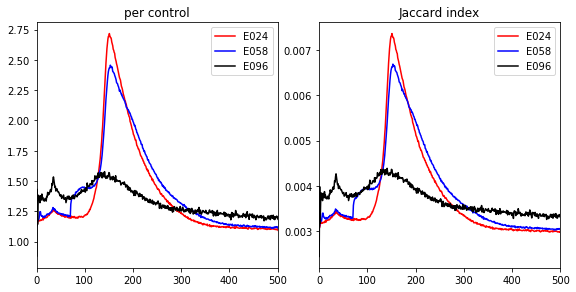

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
# お題４：
# Jaccard index の列について、同じ３サンプルの図を作る。
# 更に、「per control」の図と合わせて、「per control」「Jaccard index」の２つの図を横に並べて表示させる。
# その図を "rinkou_1009_<yourname>.pdf" という名前でローカルに保存する。


def plot_by_col(ax,df1,df2,df3,col_name):
    fig = plt.figure()
    ax.plot(df1[col_name], label="E024", color="red")
    ax.plot(df2[col_name], label="E058", color="blue")
    ax.plot(df3[col_name], label="E096", color="black")
    # ax.set_xscale("log") # x軸を対数軸にする
    # ax.set_xlim(0,1000000)
    ax.set_xlim(0,500)
    ax.legend(loc='upper right')
    ax.set_title(col_name)
    return fig

def save_2fig(yourname):
    save_name = "rinkou_1009_{}.pdf".format(yourname)
    fig.savefig(save_name)
    return

fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.tight_layout()
plot_by_col(ax1,df1,df2,df3,"per control")
plot_by_col(ax2,df1,df2,df3,"Jaccard index")
save_2fig("oba")

In [9]:
# お題５：
# 任意の３つのサンプルを入力にとり、３サンプルを重ねた「per control」の図をpdfとして出力するPythonスクリプトを作成する。
# その際、前回用いたサンプルファイル、もしくは自分が作成したスクリプトを改良するかたちで行うこと。
# 出力例はtestdata ディレクトリに含まれるサンプルのうち３つを利用する。出力される図はlegendが適切に入るようにすること。

In [10]:
# 発展課題（余裕があれば）
# testdata ディレクトリに含まれる全てのサンプルについて、１サンプルずつ per control(0~500 bp) のpdfを出力する
# Pythonスクリプト or シェルスクリプトを作成する。

今回のペア
- 王　ー　堺谷（＆西條）
- 仲嶋　ー　横田
- 牧野　ー　大庭

事前のディスカッションは特に必要ない。最低限pull request -> merge後のディスカッションのみでOK。（もちろん希望あれば多く議論することは良いこと）